In [1]:
# /home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/up_train_80_test_20_obb_v1__1120_100/images/labels

#Ground Truth
# /home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_10803_v1/test/labels

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import os
from garuda.od import ConfusionMatrix

In [7]:
predicted_path = '/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/multi_state_data_train_80_test_amedabad_obb_v1__1120_100/images/labels'
ground_truth_path = '/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/amedabad_10_km_buffer_data/labels'

fcbk = 0
zigzag = 0

prediction = []
ground_truth = []
predicted_labels = glob(predicted_path+'/*')
for label in predicted_labels:
    filename = os.path.basename(label)
    print(filename)
    predicted_label_txt = np.loadtxt(label, ndmin = 2)
    zigzag += np.sum(np.where(predicted_label_txt[:,0]==1, 1, 0))
    fcbk += np.sum(np.where(predicted_label_txt[:,0]==0, 1, 0))
    print(predicted_label_txt)
    prediction.append(predicted_label_txt.astype(np.float32))
    ground_truth_label_txt = np.loadtxt(os.path.join(ground_truth_path,filename),ndmin = 2)
    print(ground_truth_label_txt)
    ground_truth.append(ground_truth_label_txt.astype(np.float32))
    

23.10,72.54.txt
[[1.       0.973929 0.548413 1.00016  0.555757 1.01228  0.512477 0.986047
  0.505133]]


FileNotFoundError: /home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/amedabad_10_km_buffer_data/labels/23.10,72.54.txt not found.

In [3]:
print(fcbk,zigzag)

2373 3631


Supervision Confusion matrix

|True fcbk| | | |
|--- |-|-|-|
|True zigzag| | | |
|True bg    | | | |
|  | Pred fcbk|Pred zigzag|Pred bg|

In [8]:
classes = ['FCBK','Zigzag']
conf_threshold = 0.25
iou_threshold = 0.5
cm = ConfusionMatrix.from_obb_tensors(prediction, ground_truth, classes, conf_threshold, iou_threshold)
df = pd.DataFrame(cm.matrix, columns = ['predicted_fcbk','predicted_zigzag','predicted_bg'], index=['true_fcbk','true_zigzag','true_bg'])
print(f'conf_threshold = {conf_threshold}, iou_threshold = {iou_threshold}')
df

TypeCheckError: Type-check error whilst checking the parameters of garuda.od.ConfusionMatrix.from_obb_tensors.
The problem arose whilst typechecking parameter 'predictions'.
Actual value: [ array([[1.      , 0.973929, 0.548413, 1.00016 , 0.555757, 1.01228 ,
        0.512477, 0.986047, 0.505133]], dtype=float32)]
Expected type: list[Float[ndarray, '_ 10']].
----------------------
Called with parameters: { 'classes': ['FCBK', 'Zigzag'],
  'cls': <class 'garuda.od.ConfusionMatrix'>,
  'conf_threshold': 0.25,
  'iou_threshold': 0.5,
  'predictions': [ array([[1.      , 0.973929, 0.548413, 1.00016 , 0.555757, 1.01228 ,
        0.512477, 0.986047, 0.505133]], dtype=float32)],
  'targets': []}
Parameter annotations: (cls, predictions: list[Float[ndarray, '_ 10']], targets: list[Float[ndarray, '_ 9']], classes: list[str], conf_threshold: float, iou_threshold: float) -> Any.


In [11]:
df1 = cm.summary
df1['Overall'] = df1['FCBK']+df1['Zigzag']
df1.loc[['Precision','Recall','F1 Score'],'Overall'] = df1.loc[['Precision','Recall','F1 Score']] /2
print(df1.to_markdown())

|                     |        FCBK |      Zigzag |      Overall |
|:--------------------|------------:|------------:|-------------:|
| Actual Positives    | 6406        | 4587        | 10993        |
| Predicted Positives | 6774        | 4713        | 11487        |
| True Positives      | 6379        | 4489        | 10868        |
| False Positives     |  395        |  224        |   619        |
| False Negatives     |   27        |   98        |   125        |
| Precision           |    0.941689 |    0.952472 |     0.94708  |
| Recall              |    0.995785 |    0.978635 |     0.98721  |
| F1 Score            |    0.967982 |    0.965376 |     0.966679 |


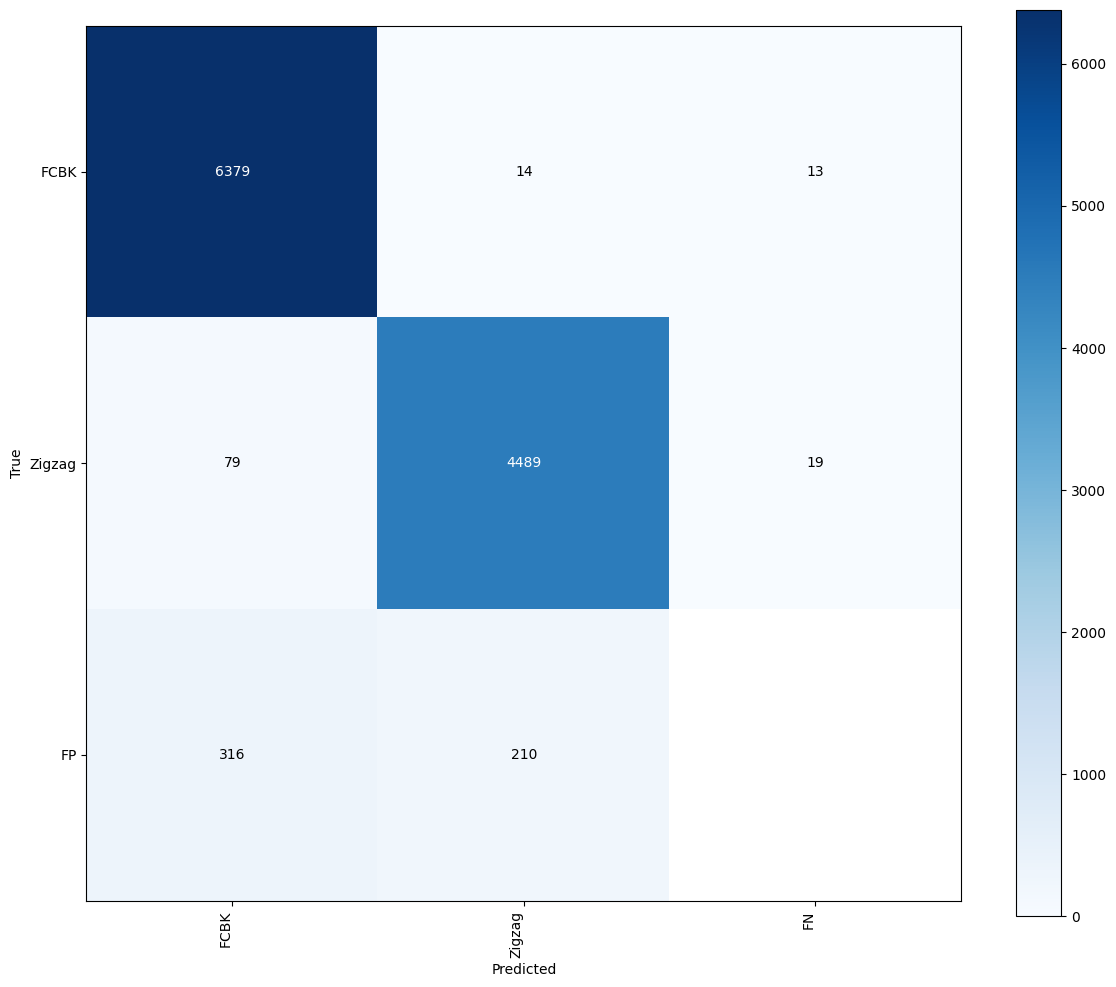

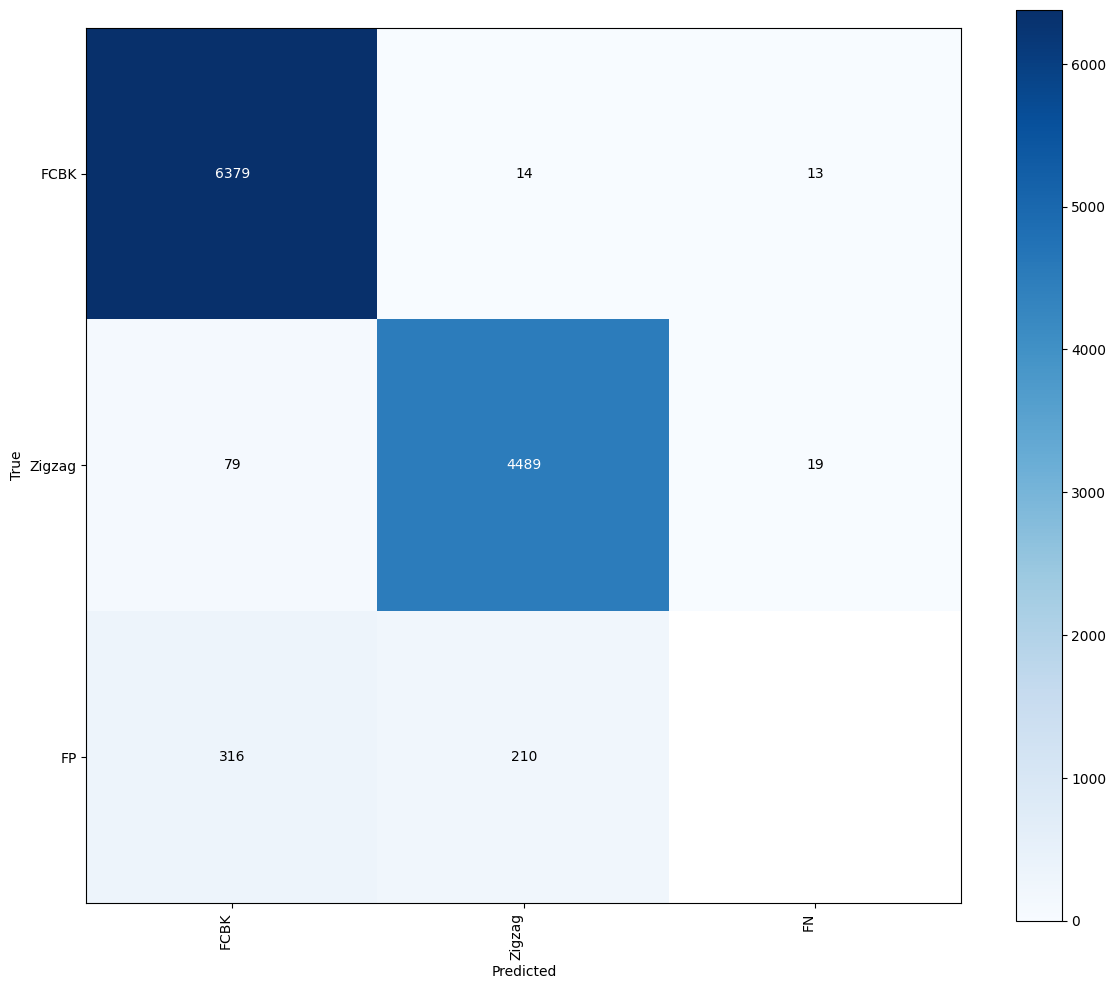

In [12]:
cm.plot()